In [113]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/startup-failures/Startup Failure (Finance and Insurance).csv
/kaggle/input/startup-failures/Startup Failures.csv
/kaggle/input/startup-failures/Startup Failure (Manufactures).csv
/kaggle/input/startup-failures/Startup Failure (Retail Trade).csv
/kaggle/input/startup-failures/Startup Failure (Health Care).csv
/kaggle/input/startup-failures/Startup Failure (Food and services).csv
/kaggle/input/startup-failures/Startup Failures (Information Sector).csv


In [114]:
data = pd.read_csv("/kaggle/input/startup-failures/Startup Failures.csv")
data_FandI = pd.read_csv("/kaggle/input/startup-failures/Startup Failure (Finance and Insurance).csv")
data_Manu = pd.read_csv("/kaggle/input/startup-failures/Startup Failure (Manufactures).csv")
data_Retail = pd.read_csv("/kaggle/input/startup-failures/Startup Failure (Retail Trade).csv")
data_HealthC = pd.read_csv("/kaggle/input/startup-failures/Startup Failure (Health Care).csv")
data_Food = pd.read_csv("/kaggle/input/startup-failures/Startup Failure (Food and services).csv")
data_Info = pd.read_csv("/kaggle/input/startup-failures/Startup Failures (Information Sector).csv")

datas = [data,data_FandI, data_Manu,data_Retail,data_HealthC, data_Food,data_Info]
datas_n = ["data","data_FandI", "data_Manu","data_Retail","data_HealthC", "data_Food","data_Info"]

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                815 non-null    object
 1   Sector              815 non-null    object
 2   Years of Operation  815 non-null    object
dtypes: object(3)
memory usage: 19.2+ KB


In [115]:
# Process to Merge the Data

i=0
for data in datas:
    print("\n")
    print(datas_n[i])
    print("\n")
    i+=1
    data.info()
    



data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                815 non-null    object
 1   Sector              815 non-null    object
 2   Years of Operation  815 non-null    object
dtypes: object(3)
memory usage: 19.2+ KB


data_FandI


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    47 non-null     object 
 1   Sector                  47 non-null     object 
 2   Years of Operation      47 non-null     object 
 3   What They Did           47 non-null     object 
 4   How Much They Raised    47 non-null     object 
 5   Why They Failed         47 non-null     object 
 6   Takeaway                47 non-null     object 
 7   Giants

In [116]:
# Merging Data

dfs = [data_FandI, data_Manu, data_Retail, data_HealthC, data_Food, data_Info]
merged_data = pd.concat(dfs, ignore_index=True, sort=False)

print(merged_data.shape)

(409, 21)


In [117]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    409 non-null    object 
 1   Sector                  409 non-null    object 
 2   Years of Operation      409 non-null    object 
 3   What They Did           409 non-null    object 
 4   How Much They Raised    409 non-null    object 
 5   Why They Failed         409 non-null    object 
 6   Takeaway                409 non-null    object 
 7   Giants                  409 non-null    int64  
 8   No Budget               409 non-null    int64  
 9   Competition             409 non-null    int64  
 10  Poor Market Fit         409 non-null    int64  
 11  Acquisition Stagnation  409 non-null    int64  
 12  Platform Dependency     383 non-null    float64
 13  Monetization Failure    409 non-null    int64  
 14  Niche Limits            409 non-null    in

In [118]:
data_copy = merged_data.copy() # Keeping a copy of the original data for safety

# Lets Do Data Cleaning and Preprocessing

In [119]:
merged_data.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



,Name,Sector,Years of Operation,What They Did,How Much They Raised,Why They Failed,Takeaway,Giants,No Budget,Competition,...,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype,High Operational Costs
0,Avant,Finance and Insurance,2012-2023,Online personal loans,$655M,Lost to LendingClub and high defaults,Lending needs risk balance,1,1,1,...,0,0.0,0,0,0,0,0.0,0.0,0.0,NaN
1,Bitpass,Finance and Insurance,2002-2008,Micropayments platform,$2M,Lost to PayPal and low adoption,Micropayments need mass use,1,0,1,...,0,0.0,0,0,0,0,0.0,0.0,0.0,NaN
2,Cake Financial,Finance and Insurance,2006-2011,Portfolio tracking tool,$3M,Lost to Mint and sold to TradeKing,Finance tools need scale,1,0,1,...,1,0.0,0,0,0,0,0.0,0.0,0.0,NaN
3,Circle,Finance and Insurance,2013-2023,Crypto payments and stablecoin,$500M,Lost to Coinbase and market shifts,Crypto needs stability,1,0,1,...,0,0.0,0,0,0,1,0.0,0.0,0.0,NaN
4,Clarity Money,Finance and Insurance,2016-2022,Personal finance app,$11M,Lost to Mint/Acorns and sold to Goldman,Finance apps need edge,1,0,1,...,1,0.0,0,0,0,0,0.0,0.0,0.0,NaN


In [120]:
# Converting the Funding amounts from string/object type to float type and making a new col called Funding Amount.

merged_data[["Amount","Unit"]] = merged_data['How Much They Raised'].str.extract(r'(\d+\.?\d*)([MBK]?)')
merged_data["Amount"] = pd.to_numeric(merged_data['Amount'], errors = "coerce")
multipliers = {"M":1, "B":1000, "K":1/1000}
merged_data['Funding Amount'] = merged_data["Amount"]*merged_data["Unit"].map(multipliers).fillna(1)
merged_data['Funding Amount'] = merged_data['Funding Amount'].astype("Float64")
merged_data.drop(columns=["Amount", "Unit"], inplace = True)

merged_data.tail()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



,Name,Sector,Years of Operation,What They Did,How Much They Raised,Why They Failed,Takeaway,Giants,No Budget,Competition,...,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype,High Operational Costs,Funding Amount
404,GoAnimate,Information,14 (2007-2021),DIY animation tool,$10M,Sold 2021; lost to Powtoon,Scale beats tools,1,0,1,...,0.0,0,0,0,0,0.0,0.0,0.0,NaN,10.0
405,Hitpost,Information,4 (2009-2013),Sports social app,$1M,Closed 2013; lost to X,Giants own fandom,1,0,0,...,0.0,0,1,0,0,0.0,0.0,0.0,NaN,1.0
406,Homer,Information,6 (2013-2019),Kids' reading app,$2.2M,Sold 2019; lost to Epic!,Kids' ed needs scale,1,0,1,...,0.0,0,0,0,0,0.0,0.0,0.0,NaN,2.2
407,Hot Potato,Information,2 (2009-2011),Social check-in app,$1.4M,Acquired 2011; shut down; lost to Foursquare,Early exits end,0,0,1,...,0.0,0,0,0,0,0.0,0.0,0.0,NaN,1.4
408,Humanoid,Information,5 (2012-2017),Content curation platform,$1M,Closed 2017; lost to Medium,Curation needs clout,1,0,1,...,0.0,0,0,0,0,0.0,0.0,0.0,NaN,1.0


In [121]:
billionRows = merged_data[merged_data["How Much They Raised"].str.contains("B",na=False)]
billionRows

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



,Name,Sector,Years of Operation,What They Did,How Much They Raised,Why They Failed,Takeaway,Giants,No Budget,Competition,...,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype,High Operational Costs,Funding Amount
12,LendingClub,Finance and Insurance,2006-2021,P2P lending platform,$1B,Lost to banks and trust issues,P2P needs trust,1,0,1,...,0.0,0,0,0,0,1.0,0.0,0.0,NaN,1000.0
56,Dyson's EV Project,Manufacturing,2017-2019,Electric vehicle,$2.7B,Lost to Tesla/Nio and high costs,EVs are a giant’s game,1,1,1,...,0.0,0,0,0,0,0.0,0.0,1.0,NaN,2700.0
59,Faraday Future,Manufacturing,2014-2023,Luxury electric vehicles,$3.5B,Mismanagement and Tesla/Rivian competition,EV hype needs execution,1,1,1,...,0.0,0,0,1,0,0.0,0.0,1.0,NaN,3500.0
60,Fisker Automotive,Manufacturing,2007-2013,Luxury hybrid-electric cars,$1.4B,Lost to Tesla and supplier failure,Luxury EVs need reliability,1,1,1,...,1.0,0,0,1,0,0.0,0.0,0.0,NaN,1400.0
89,ContextLogic,Retail Trade,13 (2010-2023),Discount e-commerce app (Wish),$1.8B,Faded 2023; low-quality goods; lost to Amazon,Cheap doesn't last,1,0,1,...,0.0,0,0,0,1,1.0,0.0,0.0,NaN,1800.0
163,Zappos Labs,Retail Trade,5 (2013-2018),Experimental retail projects,$1.5B (Zappos),Faded 2018; lost to Amazon core; low impact,Experiments need wins,1,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,NaN,1500.0
164,Zappos Local,Retail Trade,5 (2015-2020),Local shopping platform,$1.5B (Zappos),Faded 2020; lost to Amazon; low uptake,Local needs pull,1,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,NaN,1500.0
223,Theranos,Health Care,2003-2018,Blood testing tech,$1.4B,Fraud and tech didn’t work,Transparency is key,0,0,0,...,0.0,0,0,0,0,1.0,0.0,1.0,NaN,1400.0
270,Dropbox Paper,Information,6 (2015-2021),Collaborative doc tool,$1.7B (Dropbox),Shut down 2021; lost to Google Docs; Notion,Stick to strengths,1,0,1,...,0.0,0,0,0,0,0.0,0.0,0.0,NaN,1700.0
278,GeoCities,Information,11 (1994-2005),Web hosting for personal pages,$0 (Yahoo $3.6B),Shut down 2005; Yahoo neglect; lost to blogs,Adapt or atrophy,1,0,0,...,0.0,0,0,0,1,0.0,0.0,0.0,NaN,0.0


In [122]:
print(merged_data["Funding Amount"].isna().sum())  # Count NaN values
merged_data = merged_data.dropna(subset=["Funding Amount"])


1


In [123]:
print(merged_data["Funding Amount"].isna().sum())

0


In [124]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 408 entries, 0 to 408
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    408 non-null    object 
 1   Sector                  408 non-null    object 
 2   Years of Operation      408 non-null    object 
 3   What They Did           408 non-null    object 
 4   How Much They Raised    408 non-null    object 
 5   Why They Failed         408 non-null    object 
 6   Takeaway                408 non-null    object 
 7   Giants                  408 non-null    int64  
 8   No Budget               408 non-null    int64  
 9   Competition             408 non-null    int64  
 10  Poor Market Fit         408 non-null    int64  
 11  Acquisition Stagnation  408 non-null    int64  
 12  Platform Dependency     382 non-null    float64
 13  Monetization Failure    408 non-null    int64  
 14  Niche Limits            408 non-null    int64  

In [125]:
# Making a column to capture the years of Operation in Float type

merged_data['Years of Operation'].unique()

array(['2012-2023', '2002-2008', '2006-2011', '2013-2023', '2016-2022',
       '2011-2016', '2021-2023', '2012-2022', '2010-2016', '2014-2019',
       '2012-2020', '2012-2021', '2006-2021', '2013-2017', '2008-2018',
       '2005-2008', '2008-2017', '2011-2017', '2002-2007', '2015-2020',
       '2009-2013', '2010-2017', '2003-2018', '2012-2017', '2016-2020',
       '2007-2018', '2009-2016', '2016-2021', '2013-2020', '2009-2022',
       '2012-2018', '2008-2020', '2012-2016', '2015-2021', '2008-2015',
       '2018-2023', '2017-2023', '2011-2023', '2009-2021', '2009-2020',
       '2011-2018', '2010-2019', '2005-2011', '2008-2019', '2007-2013',
       '2011-2020', '2017-2019', '2014-2023', '2015-2018', '2006-2017',
       '2006-2018', '2009-2017', '2014-2017', '2013-2016', '2015-2023',
       '3 (2010-2013)', '7 (2010-2017)', '10 (2006-2016)',
       '6 (2012-2018)', '5 (2012-2017)', '4 (2013-2017)', '8 (2013-2021)',
       '7 (2015-2022)', '6 (2009-2015)', '3 (2015-2018)', '8 (2012-2020)',

In [126]:
import pandas as pd

# Correct regex pattern to extract years
pattern = r'(?:(\d+) )?(\d{4})-(\d{4})?'

# Extract years
merged_data[["Years_Extracted", "Start_Year", "End_Year"]] = merged_data["Years of Operation"].str.extract(pattern)

# Convert Start_Year and End_Year to integers safely
merged_data["Start_Year"] = pd.to_numeric(merged_data["Start_Year"], errors="coerce").astype("Int64")
merged_data["End_Year"] = pd.to_numeric(merged_data["End_Year"], errors="coerce").astype("Int64")
merged_data["Years_Extracted"] = pd.to_numeric(merged_data["Years_Extracted"], errors="coerce")  # Keep as float

# Compute years of operation
merged_data["Years of Operation (Int)"] = merged_data["Years_Extracted"].fillna(
    merged_data["End_Year"].sub(merged_data["Start_Year"])
).astype("Int64")

# Drop intermediate columns
merged_data.drop(columns=["Years_Extracted", "Start_Year", "End_Year"], inplace=True)

# Check final result
merged_data.head()


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



,Name,Sector,Years of Operation,What They Did,How Much They Raised,Why They Failed,Takeaway,Giants,No Budget,Competition,...,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype,High Operational Costs,Funding Amount,Years of Operation (Int)
0,Avant,Finance and Insurance,2012-2023,Online personal loans,$655M,Lost to LendingClub and high defaults,Lending needs risk balance,1,1,1,...,0,0,0,0,0.0,0.0,0.0,NaN,655.0,11
1,Bitpass,Finance and Insurance,2002-2008,Micropayments platform,$2M,Lost to PayPal and low adoption,Micropayments need mass use,1,0,1,...,0,0,0,0,0.0,0.0,0.0,NaN,2.0,6
2,Cake Financial,Finance and Insurance,2006-2011,Portfolio tracking tool,$3M,Lost to Mint and sold to TradeKing,Finance tools need scale,1,0,1,...,0,0,0,0,0.0,0.0,0.0,NaN,3.0,5
3,Circle,Finance and Insurance,2013-2023,Crypto payments and stablecoin,$500M,Lost to Coinbase and market shifts,Crypto needs stability,1,0,1,...,0,0,0,1,0.0,0.0,0.0,NaN,500.0,10
4,Clarity Money,Finance and Insurance,2016-2022,Personal finance app,$11M,Lost to Mint/Acorns and sold to Goldman,Finance apps need edge,1,0,1,...,0,0,0,0,0.0,0.0,0.0,NaN,11.0,6


In [127]:
# check for NaN values in the new column
merged_data["Years of Operation (Int)"].isna().sum()

0

In [128]:
# drop the unnecessary columns
merged_data.drop(columns=['Years of Operation', 'How Much They Raised'], inplace=True)

In [129]:
merged_data.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



,Name,Sector,What They Did,Why They Failed,Takeaway,Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,...,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype,High Operational Costs,Funding Amount,Years of Operation (Int)
0,Avant,Finance and Insurance,Online personal loans,Lost to LendingClub and high defaults,Lending needs risk balance,1,1,1,0,0,...,0,0,0,0,0.0,0.0,0.0,NaN,655.0,11
1,Bitpass,Finance and Insurance,Micropayments platform,Lost to PayPal and low adoption,Micropayments need mass use,1,0,1,1,0,...,0,0,0,0,0.0,0.0,0.0,NaN,2.0,6
2,Cake Financial,Finance and Insurance,Portfolio tracking tool,Lost to Mint and sold to TradeKing,Finance tools need scale,1,0,1,0,1,...,0,0,0,0,0.0,0.0,0.0,NaN,3.0,5
3,Circle,Finance and Insurance,Crypto payments and stablecoin,Lost to Coinbase and market shifts,Crypto needs stability,1,0,1,0,0,...,0,0,0,1,0.0,0.0,0.0,NaN,500.0,10
4,Clarity Money,Finance and Insurance,Personal finance app,Lost to Mint/Acorns and sold to Goldman,Finance apps need edge,1,0,1,0,1,...,0,0,0,0,0.0,0.0,0.0,NaN,11.0,6


In [130]:
# check for unique values of sector
merged_data["Sector"].value_counts()

Sector
Information                        156
Retail Trade                        90
Health Care                         59
Finance and Insurance               47
Manufacturing                       30
Accommodation and Food Services     26
Name: count, dtype: int64

In [131]:
# Filling the Null Values

merged_data.isnull().sum()

Name                          0
Sector                        0
What They Did                 0
Why They Failed               0
Takeaway                      0
Giants                        0
No Budget                     0
Competition                   0
Poor Market Fit               0
Acquisition Stagnation        0
Platform Dependency          26
Monetization Failure          0
Niche Limits                  0
Execution Flaws               0
Trend Shifts                  0
Toxicity/Trust Issues        26
Regulatory Pressure          26
Overhype                     27
High Operational Costs      382
Funding Amount                0
Years of Operation (Int)      0
dtype: int64

In [132]:
# Dealing with null values in Platform Dependency

merged_data["Platform Dependency"] = merged_data["Platform Dependency"].fillna(0)
merged_data["Toxicity/Trust Issues"] = merged_data["Toxicity/Trust Issues"].fillna(0)
merged_data["Regulatory Pressure"] = merged_data["Regulatory Pressure"].fillna(0)
merged_data["Overhype"] = merged_data["Overhype"].fillna(0)
merged_data["High Operational Costs"] = merged_data["High Operational Costs"].fillna(0)


We choose "0" as the ideal null value for all the null instances. This is because "1" indicates the respective column was the causality of the failure of the business and "0" conveys that the column was NOT. and Since not being the causality is same as not knowing the causality we choose "0" as the ideal fill value for nulls. 

In [133]:
merged_data.isna().sum()
# ALl the null values have been dealt with now

Name                        0
Sector                      0
What They Did               0
Why They Failed             0
Takeaway                    0
Giants                      0
No Budget                   0
Competition                 0
Poor Market Fit             0
Acquisition Stagnation      0
Platform Dependency         0
Monetization Failure        0
Niche Limits                0
Execution Flaws             0
Trend Shifts                0
Toxicity/Trust Issues       0
Regulatory Pressure         0
Overhype                    0
High Operational Costs      0
Funding Amount              0
Years of Operation (Int)    0
dtype: int64

# Lets Start Exploring the Data

In [134]:
# Finding a Correlation between Funding Amount, Monetization Failure and No budget

corr_matrix = merged_data[['Funding Amount', 'Monetization Failure', 'No Budget']].corr()

corr_matrix

,Funding Amount,Monetization Failure,No Budget
Funding Amount,1.000000,-0.065315,0.095068
Monetization Failure,-0.065315,1.000000,0.101875
No Budget,0.095068,0.101875,1.000000


No correlation was observed between "Funding amount" and "Monetization Failure" and "No Budget".

## Q2. What are the Top 5 Reasons for Startup Failure? (Across Industries)

In [135]:
# Let's sum up all the columns of causality and check which is the highest reasons for startup failure.

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 408 entries, 0 to 408
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      408 non-null    object 
 1   Sector                    408 non-null    object 
 2   What They Did             408 non-null    object 
 3   Why They Failed           408 non-null    object 
 4   Takeaway                  408 non-null    object 
 5   Giants                    408 non-null    int64  
 6   No Budget                 408 non-null    int64  
 7   Competition               408 non-null    int64  
 8   Poor Market Fit           408 non-null    int64  
 9   Acquisition Stagnation    408 non-null    int64  
 10  Platform Dependency       408 non-null    float64
 11  Monetization Failure      408 non-null    int64  
 12  Niche Limits              408 non-null    int64  
 13  Execution Flaws           408 non-null    int64  
 14  Trend Shifts   

In [136]:
import plotly.express as px

# Define the relevant columns
cols = [
    "Giants", "No Budget", "Competition", "Poor Market Fit", "Acquisition Stagnation",
    "Platform Dependency", "Monetization Failure", "Niche Limits", "Execution Flaws",
    "Trend Shifts", "Toxicity/Trust Issues", "Regulatory Pressure", "Overhype", "High Operational Costs"
]

# Count occurrences of 1 in each column and sort in descending order
one_counts = merged_data[cols].apply(lambda col: (col == 1).sum()).sort_values(ascending=False)

# Create a bar chart using Plotly
fig = px.bar(
    x=one_counts.index, 
    y=one_counts.values, 
    labels={"x": "Factors", "y": "Number of failed Startups"},
    title="Top reasons for startup failures across industries.",
    text=one_counts.values  # Show values on bars
)

# Customize the layout
fig.update_traces( textposition="outside")  # Set bar color and text position
fig.update_layout(
    xaxis_tickangle=-45,  # Rotate x-axis labels
    xaxis_title="Factors",
    yaxis_title="Number of failed Startups",
    showlegend=False,
    template="plotly_dark"  # Use a clean theme
    
)

# Show the plot
fig.show()


In [137]:
one_counts

Giants                    308
Competition               291
Acquisition Stagnation     91
Poor Market Fit            80
No Budget                  76
Niche Limits               69
Execution Flaws            60
Monetization Failure       56
Trend Shifts               44
Toxicity/Trust Issues      23
Overhype                   19
Regulatory Pressure        14
High Operational Costs     14
Platform Dependency         7
dtype: int64

We can see that the top 5 Reasons for Startup Failure are:

1. Giants: When lost to tech giants.
2. Competition: When lost in competition.
3. Acquisition Stagnation: stagnated or faded after acquisition.
4. Poor Market Fit: if the product lacked demand or user interest.
5. No Budget: if ran out of cash or was underfunded.

ith 'Giants' and 'Competition' contributing to over 70% of the reported failure cases, their impact is nearly three times greater than the next major factor.
The first two factors—'Giants' (308 occurrences) and 'Competition' (291 occurrences)—are overwhelmingly more dominant than the third, 'Acquisition Stagnation' (91 occurrences). This indicates that market dynamics, such as established industry leaders and intense competition, play a significantly larger role in startup failures than the inability to secure acquisitions. The sheer gap in frequency suggests that startups struggle more with surviving against larger competitors and market saturation than with scaling through buyouts.

## Q3) How top 5 reasons affect the startups sector wise?

In [138]:
import plotly.express as px

# List of failure reason columns
failure_reasons = [
    "Giants", "No Budget", "Competition", "Poor Market Fit", "Acquisition Stagnation",
    "Platform Dependency", "Monetization Failure", "Niche Limits", "Execution Flaws",
    "Trend Shifts", "Toxicity/Trust Issues", "Regulatory Pressure", "Overhype", "High Operational Costs"
]

# Aggregate failure counts per sector
sector_wise_failures = merged_data.groupby("Sector")[failure_reasons].sum()

# Identify the top 5 failure reasons across all sectors
top_5_reasons = sector_wise_failures.sum().nlargest(5).index

# Filter data to keep only these reasons
sector_wise_top5 = sector_wise_failures[top_5_reasons].copy()  # Avoid SettingWithCopyWarning

# Compute total failures per sector for sorting
sector_wise_top5["Total Failures"] = sector_wise_top5.sum(axis=1)

# Sort sectors by total failures in descending order
sector_wise_top5 = sector_wise_top5.sort_values("Total Failures", ascending=False).drop(columns=["Total Failures"])

# Melt the DataFrame for Plotly
sector_wise_melted = sector_wise_top5.reset_index().melt(id_vars=["Sector"], var_name="Failure Reason", value_name="Count")

# Plot using Plotly
fig = px.bar(
    sector_wise_melted,
    x="Sector",
    y="Count",
    color="Failure Reason",
    barmode="group",  # Use "stack" for stacked bars
    title="Top 5 Reasons for Startup Failures by Sector (Sorted by Total Failures)",
    labels={"Count": "Number of Failures", "Sector": "Startup Sector"},
)

fig.update_layout(
    xaxis_tickangle=-45,
    legend_title_text="Failure Reason",
    bargap=0.2
)

# Show the plot
fig.show()


From the above bar chart, we can see that the reasons for startup failure remain almost similar sector-wise compared to overall reasons for failure. It is also worth noticing that in sectors such as "Healthcare" and "Finance and Insurance," the primary reasons are "competition" by a slightly greater margin.
Suppose we see failure reason vs sector type, the most affected industry by the giants in Information and Retail trade following it. Then the most affected industry by competition is Finance and Insurance, followed up by Manufacturing and Accommodation and Services. Acquisitation stagnation has mostly affected the Information sector. Poor market fit and No Budget affect Health Care and Retail Trade sector. 
Collectively we can conclude that the markets are very competitive for the startups and the giants are merciless.

## Q4) Majority startups are lost to which Giants?

In [139]:
pattern = r'Google|Amazon|Apple|AWS|Tesla|Paypal|Facebook|Meta|Instagram'

lost_to_google = merged_data[merged_data["Why They Failed"].str.contains(pattern, case=False, na=False)]
sector_wise_lost_to_google = lost_to_google.groupby("Sector").size()
sector_wise_lost_to_google
percent = (sector_wise_lost_to_google/(merged_data["Sector"]=="Information").sum())*100
percent_df = percent.reset_index().rename(columns={0:"Percent", "index":"Sector"}).dropna()
percent_df

,Sector,Percent
0,Finance and Insurance,2.564103
1,Information,25.641026
2,Manufacturing,5.769231
3,Retail Trade,23.076923


In [140]:
fig = px.bar(
    percent_df,
    x="Sector",
    y="Percent",
    title = "Percentage of Companies Lost to (Google, Amazon, Apple, AWS, Tesla, Paypal, Facebook, Meta, Instagram)",
    color="Sector",
    labels = {"0": "Percent of startups lost to Giants", "Sector": "Name of the sector"},
)

fig.update_layout(
    xaxis_tickangle=-45,
    legend_title_text="Sector",
    template="plotly_white"
    
)

fig.show()


In [141]:
# total percent of companies lost to (Google, Amazon, Apple, AWS, Tesla, Paypal, Facebook, Meta, Instagram)

total_percent = percent_df["Percent"].sum()
total_percent

57.051282051282044

In [142]:
pattern1 = r'Google'
pattern2= r'Amazon|AWS'
pattern3= r'Facebook|Meta|Instagram'


lost_to_google = merged_data[merged_data["Why They Failed"].str.contains(pattern2, case=False, na=False)]
sector_wise_lost_to_google = lost_to_google.groupby("Sector").size()
sector_wise_lost_to_google
percent = (sector_wise_lost_to_google/(merged_data["Sector"]=="Information").sum())*100
percent_df = percent.reset_index().rename(columns={0:"Percent", "index":"Sector"}).dropna()
percent_df

,Sector,Percent
0,Information,3.846154
1,Retail Trade,21.794872


Here we can see that a lot of startups in information, manufacturing, Retail Trade, and Finance and Insurance were lost only these 6 company/company groups which are "Google, Amazon/AWS, Apple, Tesla, Paypal, Facebook/Meta/Instagram)". The highest being Google-10% and Facebook|Meta|Instagram-10%, to which in total 20 percent of startups in the information sector itself were lost. The highest in the Retail Trade sector is Aamazon-22%.

In Total a whopping 57% of startups in across Information, Retail Trade, Manufacturing, and Finance and Insurance where lost the there 6 giant company groups. 

## Q5) Top Reasons for AI startups to Fail?

In [143]:
## Top Reasons for AI startups to Fail?

AI_count = merged_data[merged_data['What They Did'].str.contains('AI', case=True, na=False)]
sector_wise = AI_count.groupby("Sector").size().sort_values(ascending=False)
sector_wise

Sector
Health Care              6
Information              4
Finance and Insurance    2
Manufacturing            1
Retail Trade             1
dtype: int64

In [144]:
failure_reasons = [
    "Giants", "No Budget", "Competition", "Poor Market Fit", "Acquisition Stagnation",
    "Platform Dependency", "Monetization Failure", "Niche Limits", "Execution Flaws",
    "Trend Shifts", "Toxicity/Trust Issues", "Regulatory Pressure", "Overhype", "High Operational Costs"
]

AI_count = merged_data[merged_data['What They Did'].str.contains('AI', case=True, na=False)]

# Sum the failure reasons for AI startups
top_failures_ai = AI_count[failure_reasons].sum().sort_values(ascending=False)

# Display the sorted failure reasons
top_failures_ai


Giants                    10.0
Competition               10.0
No Budget                  6.0
Execution Flaws            5.0
Acquisition Stagnation     2.0
Trend Shifts               2.0
Regulatory Pressure        2.0
Poor Market Fit            1.0
Niche Limits               1.0
Overhype                   1.0
Platform Dependency        0.0
Monetization Failure       0.0
Toxicity/Trust Issues      0.0
High Operational Costs     0.0
dtype: float64

We can see That the top reasons for AI startups to Fail across industries in Giants, Competition, No budget, Execution flaws and Acquisition Stagnation. Giants and Competition are the Most affecting factors.

## Q6) Is there any explicit correlation between each failure reasons.

In [145]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 408 entries, 0 to 408
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      408 non-null    object 
 1   Sector                    408 non-null    object 
 2   What They Did             408 non-null    object 
 3   Why They Failed           408 non-null    object 
 4   Takeaway                  408 non-null    object 
 5   Giants                    408 non-null    int64  
 6   No Budget                 408 non-null    int64  
 7   Competition               408 non-null    int64  
 8   Poor Market Fit           408 non-null    int64  
 9   Acquisition Stagnation    408 non-null    int64  
 10  Platform Dependency       408 non-null    float64
 11  Monetization Failure      408 non-null    int64  
 12  Niche Limits              408 non-null    int64  
 13  Execution Flaws           408 non-null    int64  
 14  Trend Shifts   

In [146]:
failure_corr = merged_data.iloc[:, 5:20]

corr_matix = failure_corr.corr()

print(corr_matix)



                          Giants  No Budget  Competition  Poor Market Fit  \
Giants                  1.000000  -0.049359     0.230863        -0.235255   
No Budget              -0.049359   1.000000    -0.183828         0.064980   
Competition             0.230863  -0.183828     1.000000        -0.205556   
Poor Market Fit        -0.235255   0.064980    -0.205556         1.000000   
Acquisition Stagnation  0.058911  -0.210979     0.014263        -0.205287   
Platform Dependency     0.075284   0.033746    -0.083163        -0.065251   
Monetization Failure   -0.203247   0.101875    -0.140815         0.054171   
Niche Limits           -0.046943   0.036058    -0.133201         0.188903   
Execution Flaws        -0.020821   0.103515    -0.058059        -0.152774   
Trend Shifts           -0.003962   0.077204    -0.076569        -0.131901   
Toxicity/Trust Issues  -0.008962  -0.089647    -0.009503        -0.093944   
Regulatory Pressure    -0.017799  -0.055605     0.030210        -0.059181   

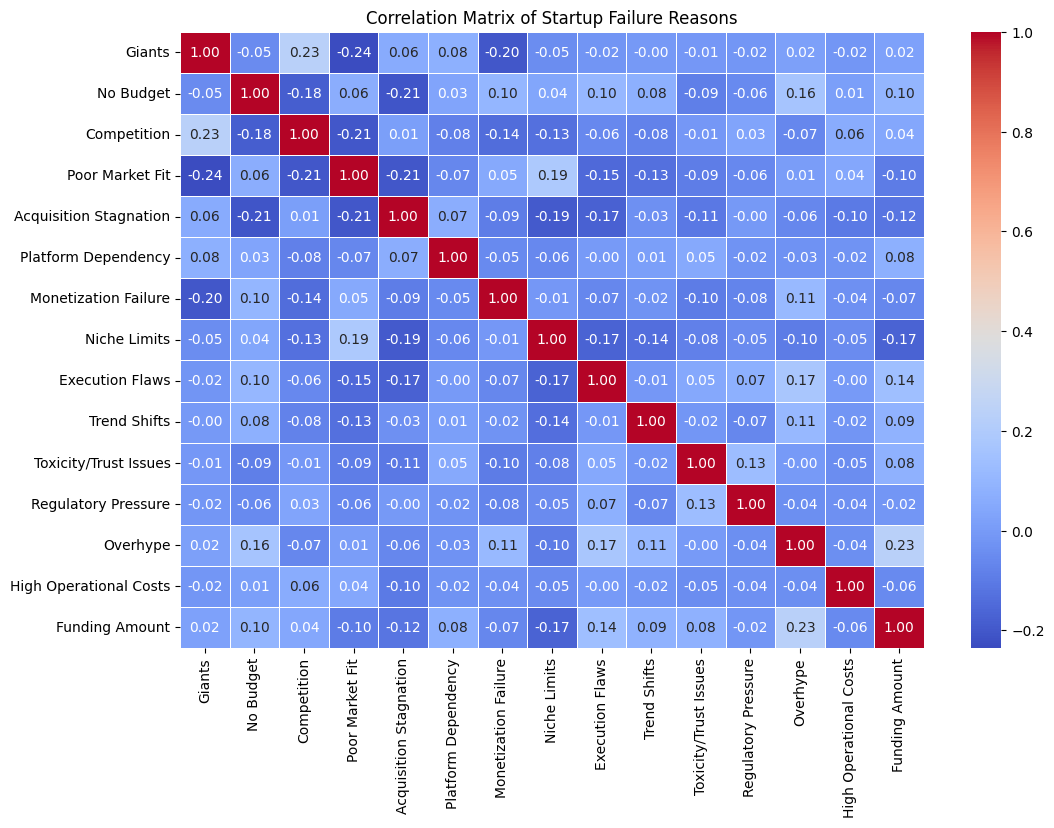

In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Startup Failure Reasons")
plt.show()


As we can see there is not substantial relationship between any two reasons.

Overhype & Funding Amount → 0.2289: Slight positive correlation, meaning overhyped startups tend to have more funding.
Execution Flaws & Overhype → 0.1709: Somewhat correlated, suggesting overhyped startups may suffer execution issues.
Niche Limits & Poor Market Fit → 0.1889: Weak positive correlation, meaning niche-focused startups may struggle with market fit.

Some weak relationships exist, but they are not substantial enough to be highly predictive.

## Q7) What is the average life of a failed startup?  

In [148]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 408 entries, 0 to 408
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      408 non-null    object 
 1   Sector                    408 non-null    object 
 2   What They Did             408 non-null    object 
 3   Why They Failed           408 non-null    object 
 4   Takeaway                  408 non-null    object 
 5   Giants                    408 non-null    int64  
 6   No Budget                 408 non-null    int64  
 7   Competition               408 non-null    int64  
 8   Poor Market Fit           408 non-null    int64  
 9   Acquisition Stagnation    408 non-null    int64  
 10  Platform Dependency       408 non-null    float64
 11  Monetization Failure      408 non-null    int64  
 12  Niche Limits              408 non-null    int64  
 13  Execution Flaws           408 non-null    int64  
 14  Trend Shifts   

In [149]:
merged_data['Years of Operation (Int)'].describe()

count       408.0
mean     7.534314
std      3.510434
min           2.0
25%           5.0
50%           7.0
75%          10.0
max          18.0
Name: Years of Operation (Int), dtype: Float64

We can see that the average age of a failed startup is 7.5 years across industries, with a minimum of 2 years and a maximum of 18 years.

Let's study the distribution of the lifespan.

In [150]:
import plotly.express as px

fig = px.histogram(merged_data, x="Years of Operation (Int)", nbins=20)
fig.show()

Most Startups Fail Early (Between 3-7 Years)

There is a peak around 5-6 years, where the highest number of startups fail.

A significant number also fail within 3-4 years, indicating early-stage struggles.

Failures Decline Gradually After 7 Years

As the number of operational years increases, the failure rate decreases.

Fewer startups fail beyond 10-12 years, suggesting that those who survive this period are more stable.

Very Few Startups Fail After 15 Years

There are almost no failures beyond 15 years, implying that long-standing startups have a higher chance of sustained success.

Conclusion:
Early-stage survival is critical: Most startups fail within their first 5-7 years.

Mid-stage risk exists: Some startups continue failing up to 10-12 years, but at a lower rate.

If a startup survives 15+ years, it is highly likely to sustain.

### Lets study this industry Wise

In [151]:
a = merged_data.groupby("Sector")['Years of Operation (Int)'].agg(['mean', 'median', 'min', 'max', 'count',"std"])
a

,mean,median,min,max,count,std
Sector,,,,,,
Accommodation and Food Services,6.692308,5.5,3,15,26,3.043278
Finance and Insurance,7.595745,6.0,2,15,47,3.261499
Health Care,6.966102,6.0,2,18,59,3.662325
Information,8.282051,7.0,2,18,156,3.939535
Manufacturing,6.966667,7.0,2,12,30,2.785224
Retail Trade,7.011111,6.0,2,15,90,2.858044


In [152]:
# lets normalize the data for fair comparison

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# create a copy of data
a_normalized = a.copy()

# Apply Min Max Scaling to the numeric Cols
scaler = MinMaxScaler()
a_normalized[['mean', 'median', 'min', 'max', 'std']] = scaler.fit_transform(a[['mean', 'median', 'min', 'max', 'std']])

a_normalized


,mean,median,min,max,count,std
Sector,,,,,,
Accommodation and Food Services,0.000000,0.000000,1.0,0.5,26,0.223557
Finance and Insurance,0.568291,0.333333,0.0,0.5,47,0.412605
Health Care,0.172225,0.333333,0.0,1.0,59,0.759848
Information,1.000000,1.000000,0.0,1.0,156,1.000000
Manufacturing,0.172581,1.000000,0.0,0.0,30,0.000000
Retail Trade,0.200538,0.333333,0.0,0.5,90,0.063085


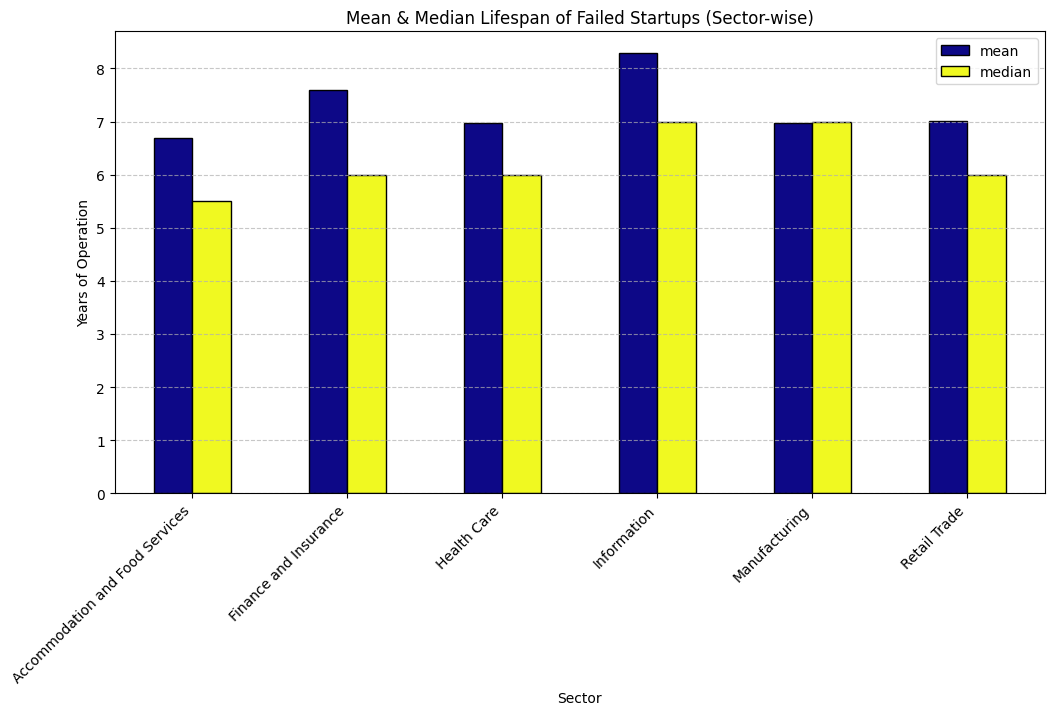

In [153]:
a[["mean", "median"]].plot(kind="bar", figsize=(12,6), colormap="plasma", edgecolor="black")
plt.ylabel("Years of Operation")
plt.title("Mean & Median Lifespan of Failed Startups (Sector-wise)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Key Takeaways on Failed Startup Lifespan (Sector-wise):

Tech & Information Startups Last the Longest – Mean lifespan 8.28 years, indicating longer survival before failure.

Food & Accommodation Startups Fail the Fastest – Median lifespan 5.5 years, likely due to high costs and competition.

Retail, Health Care, and Manufacturing Have Similar Lifespans – Around 7 years on average.

Finance & Insurance Show Variability – Some startups survive long, but most fail in ~6 years (median).

Information & Health Care Have High Variability – Some startups last significantly longer, others fail early.

## Q8) Is there any correlation between life span and any other failure reason?

In [154]:
failure_lifespan_corr = merged_data.iloc[:, 5:21]

corr_matix2 = failure_lifespan_corr.corr()

print(corr_matix2)


                            Giants  No Budget  Competition  Poor Market Fit  \
Giants                    1.000000  -0.049359     0.230863        -0.235255   
No Budget                -0.049359   1.000000    -0.183828         0.064980   
Competition               0.230863  -0.183828     1.000000        -0.205556   
Poor Market Fit          -0.235255   0.064980    -0.205556         1.000000   
Acquisition Stagnation    0.058911  -0.210979     0.014263        -0.205287   
Platform Dependency       0.075284   0.033746    -0.083163        -0.065251   
Monetization Failure     -0.203247   0.101875    -0.140815         0.054171   
Niche Limits             -0.046943   0.036058    -0.133201         0.188903   
Execution Flaws          -0.020821   0.103515    -0.058059        -0.152774   
Trend Shifts             -0.003962   0.077204    -0.076569        -0.131901   
Toxicity/Trust Issues    -0.008962  -0.089647    -0.009503        -0.093944   
Regulatory Pressure      -0.017799  -0.055605     0.

In [155]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Create a heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
    z=corr_matix2.values,  # Correlation values
    x=corr_matix2.columns,  # Column names
    y=corr_matix2.index,    # Row names
    colorscale="Plasma",    # Color theme
    zmin=-1,  # Minimum correlation value
    zmax=1,   # Maximum correlation value
    colorbar=dict(title="Correlation")
))

# Update layout for better visibility
fig.update_layout(
    title="Heatmap of Correlation Between Failure Factors & Years of Operation",
    xaxis=dict(tickangle=45, side="top"),
    yaxis=dict(tickangle=0, autorange="reversed"),
    width=900, height=900
)

fig.show()


Negative Correlations (Factors that may shorten lifespan)

Poor Market Fit (-0.278): The strongest negative correlation. Startups that fail to align with market needs tend to have a shorter lifespan.
Niche Limits (-0.203): If a startup operates in a very limited niche, it might struggle to grow and sustain itself.
No Budget (-0.184): A lack of financial resources reduces operational time.
Overhype (-0.090): Startups that rely too much on hype may not survive long.




Positive Correlations (Factors that may extend lifespan)

Acquisition Stagnation (0.132): Startups that struggle with acquisitions seem to last slightly longer, possibly because they continue operating despite difficulties.
Funding Amount (0.128): More funding may help startups survive longer, but the correlation is not very strong.
Competition (0.109): A small positive correlation suggests that competition does not necessarily shorten a startup’s lifespan.




Conclusion:

Product-market fit is critical: The strongest negative correlation suggests that poor market fit significantly reduces survival time.
Financial constraints matter: Startups with no budget and niche limitations also struggle with longevity.
Funding helps but isn’t a guarantee: A weak positive correlation with funding suggests that while money helps, other factors like execution and market fit are crucial.